# Introduction

## Project Objective

The objective of this project is to develop and compare two machine learning models—K-Nearest Neighbors (KNN) and Convolutional Neural Network (CNN)—capable of classifying handwritten digits with high accuracy. We use the MNIST dataset, which is a standard benchmark in machine learning for image recognition tasks. The aim is to explore and implement deep learning and classical machine learning techniques that effectively recognize and classify images of digits from 0 to 9.

## Background Information

The MNIST dataset is one of the most explored datasets in the field of machine learning. It contains 70,000 grayscale images of handwritten digits, divided into a training set of 60,000 images and a test set of 10,000 images. Each image is 28x28 pixels. This dataset serves as the "hello world" of machine learning for image recognition. It is widely used for training and testing in the field of machine learning, especially to benchmark algorithms and techniques in image processing and computer vision.

By using this dataset, we not only learn the fundamental concepts of neural networks but also explore how variations in the model architecture, learning rates, and preprocessing steps affect the overall performance of the model. Our focus is to develop robust models that not only learn to recognize and classify digits accurately but also serve as a stepping stone for more complex image recognition challenges.

## Methodology Overview

### Importing Necessary Libraries

To begin, we import essential libraries for data handling, model building, training, and evaluation. These include TensorFlow for building neural networks, scikit-learn for classical machine learning algorithms and evaluation metrics, Matplotlib for plotting, and others.

### Data Loading and Preprocessing

We load the MNIST dataset, normalize the pixel values, and reshape the images to match the input requirements of the models. For KNN, we flatten the images, while for CNN, we maintain the 2D structure with an additional channel dimension.

### Model Building and Training

1. **K-Nearest Neighbors (KNN):** We define and train a KNN classifier on the flattened images.
2. **Convolutional Neural Network (CNN):** We build a CNN model with multiple convolutional, pooling, and dense layers, followed by training on the preprocessed images.

### Model Evaluation

We evaluate both models using accuracy scores and confusion matrices. The accuracy provides a quantitative measure of performance, while the confusion matrix offers detailed insights into the classification results for each digit.

### Visualizations

We visualize the sample images from the dataset, training and validation metrics for the CNN model, and the confusion matrices for both KNN and CNN models to better understand their performance.

## Conclusion

In the end, we compare the results of both models, discussing their strengths and weaknesses, and explore potential improvements and applications in more complex image recognition tasks.


### Importing Necessary Libraries

First, we need to import the necessary libraries for building and training our model, as well as for evaluating its performance. These include:

- `datetime` for handling dates and times.
- `numpy` for numerical operations.
- `tensorflow` for building neural networks.
- `matplotlib.pyplot` for plotting.
- `sklearn.metrics` for evaluating model performance, specifically accuracy and confusion matrix.
- `sklearn.neighbors.KNeighborsClassifier` for using the K-Nearest Neighbors algorithm.
- `tensorflow.keras.layers`, `tensorflow.keras.models`, and `tensorflow.keras.regularizers` for defining and building the neural network.
- `tensorflow.keras.callbacks.TensorBoard` for logging the training process.
- `tensorflow.keras.utils.plot_model` for visualizing the model architecture.


In [14]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

### Loading the MNIST Dataset

Next, we load the MNIST dataset, which is a dataset of handwritten digits commonly used for training and testing image processing systems. The dataset is provided by TensorFlow and can be loaded directly.

The MNIST dataset is split into two parts:
- `train_images` and `train_labels`: the training set.
- `test_images` and `test_labels`: the testing set.

The dataset contains 60,000 training images and 10,000 testing images, each labeled with the corresponding digit (0-9).


In [15]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Data Exploration and Preprocessing

### Displaying Sample Images from the MNIST Dataset

To better understand the data we are working with, let's visualize some sample images from the MNIST dataset along with their corresponding labels. This helps in getting an idea of how the images look and what the model will be trained on.

The following code will display the first 10 images from the training set along with their labels.


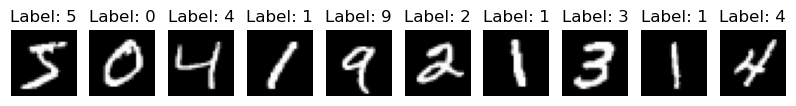

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Display some images from the dataset
fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i, ax in enumerate(axes):
    ax.imshow(train_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.show()

## Preprocessing Steps

To prepare our data for the neural network, we perform the following preprocessing steps:

1. **Normalization**: Scale the image pixel values to a range of 0 to 1. This normalization helps with the training dynamics of deep learning models, making training faster and more stable.

2. **Reshaping**: Since we are using a CNN, we need to ensure our image data includes a channel dimension. For grayscale images, this dimension is 1.

3. **One-hot Encoding**: Convert the categorical label integers into a binary matrix representation suitable for classification with a neural network.


In [17]:
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0

train_images_normalized = train_images_normalized.reshape((-1, 28, 28, 1))
test_images_normalized = test_images_normalized.reshape((-1, 28, 28, 1))

train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)

### Defining parameters

### Defining Model Parameters

Before building the Convolutional Neural Network (CNN), we need to define some key parameters:

- **imageSize:** The shape of the input images (28x28 pixels with 1 color channel, as they are grayscale).
- **numFilters:** The number of filters (feature detectors) to be used in the convolutional layers.
- **filterSize:** The size of the filters to be used in the convolutional layers.
- **numImageCategories:** The number of categories/classes in the dataset (0-9 for the MNIST dataset).


In [18]:
imageSize = (28, 28, 1)
numFilters = 32
filterSize = (5, 5)
numImageCategories = 10

## CNN Design Rationale

Our CNN architecture consists of multiple convolutional layers, pooling layers, and fully connected layers. Here’s why we use each:

- **Convolutional Layers**: These layers are the core building blocks of a CNN. They perform convolution operations that capture the underlying features of the images like edges, corners, etc.
- **Pooling Layers**: These layers reduce the dimensions of the data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer. This reduces computation and controls overfitting.
- **Batch Normalization**: This technique normalizes the inputs heading into the next layer, ensuring the network trains efficiently. It also helps to reduce the internal covariate shift.
- **Activation Functions**: We use ReLU (Rectified Linear Activation) for our hidden layers because it introduces non-linearity, allowing the model to learn more complex patterns.
- **Regularization**: We apply L2 regularization to prevent the model weights from becoming too large, which can lead to overfitting.
- **Output Layer**: The final layer is a dense layer with a softmax activation function, which is used to output a probability distribution over the 10 digit classes.


## Detailed Configuration of the CNN Model

Our convolutional neural network (CNN) is meticulously configured to optimize performance for the task of digit recognition. Below, we detail the types of layers used, their specific settings, and the hyperparameters chosen for the model:

### Layers and Configuration

1. **Batch Normalization Layer**:
   - **Purpose**: Normalizes the input layer by adjusting and scaling activations.
   - **Placement**: Before the first convolutional layer to stabilize the learning process and improve convergence rates.
      
2. **First Convolutional Layer**:
   - **Filters**: 32
   - **Kernel Size**: 5x5
   - **Activation**: ReLU (Rectified Linear Activation)
   - **Padding**: 'same' (to ensure the output has the same width and height as the input)
   - **Regularization**: L2 regularization with a factor of 0.01 to help prevent overfitting by penalizing large weights.

3. **First Max Pooling Layer**:
   - **Pool Size**: 2x2 (reduces the spatial dimensions by half)
   - **Purpose**: To reduce the computational complexity by downscaling feature dimensions.

4. **Second Convolutional Layer**:
   - **Filters**: 64
   - **Kernel Size**: 5x5
   - **Activation**: ReLU
   - **Padding**: 'same'
   - **Regularization**: L2 regularization with a factor of 0.01.

5. **Second Max Pooling Layer**:
   - **Pool Size**: 2x2

6. **Flattening Layer**:
   - **Purpose**: Converts the 2D feature maps into 1D feature vectors necessary for the fully connected layer.

7. **Dense Layer (Fully Connected Layer)**:
   - **Units**: 128 neurons
   - **Activation**: ReLU
   - **Regularization**: L2 regularization with a factor of 0.01.

8. **Output Layer**:
   - **Units**: 10 (corresponding to the 10 digit classes)
   - **Activation**: Softmax (outputs a probability distribution across the 10 classes)

### Hyperparameters

- **Learning Rate**: Initially set at 0.001, adjusted dynamically through callbacks based on training progress.
- **Loss Function**: Categorical Crossentropy, suitable for multi-class classification tasks.
- **Optimizer**: Adam, known for its efficiency in both memory and computation.

This configuration ensures a balance between model complexity and computational efficiency, making it robust enough to accurately classify the MNIST dataset digits while maintaining reasonable training times.


### Creating Neural Network

In [19]:
# Building a Sequential convolutional neural network (CNN) model using Keras.

model = models.Sequential([
    # Input and normalization layer to accelerate training by normalizing the initial inputs.
    layers.BatchNormalization(input_shape=imageSize),

    # First convolutional layer with padding added to process edges of the input image effectively.
    # Uses ReLU activation and L2 regularization to prevent overfitting.
    layers.ZeroPadding2D(padding=(2, 2)),
    layers.Conv2D(numFilters, filterSize, padding='valid', activation='relu', kernel_regularizer=regularizers.l2(0.004)),
    layers.MaxPooling2D((2, 2)),  # Pooling layer to reduce spatial dimensions of the output from the previous layer.

    # Second convolutional layer, structured like the first to further extract features from the input.
    layers.ZeroPadding2D(padding=(2, 2)),
    layers.Conv2D(numFilters, filterSize, padding='valid', activation='relu', kernel_regularizer=regularizers.l2(0.004)),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer, increasing the number of filters to capture more complex features.
    layers.ZeroPadding2D(padding=(2, 2)),
    layers.Conv2D(numFilters * 2, filterSize, padding='valid', activation='relu', kernel_regularizer=regularizers.l2(0.004)),
    layers.MaxPooling2D((2, 2)),

    # Fourth convolutional layer, similar setup, ensuring the feature maps are well processed.
    layers.ZeroPadding2D(padding=(2, 2)),
    layers.Conv2D(numFilters, filterSize, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.004)),
    layers.MaxPooling2D((2, 2)),

    # Flatten the 3D output to 1D for processing in fully connected layers.
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.004)),  # First dense layer with 64 neurons.

    # Output layer with a softmax activation to output probabilities for each of the 10 classes.
    layers.Dense(numImageCategories, activation='softmax', kernel_regularizer=regularizers.l2(0.004)),
])

# Compile the model specifying the optimizer, loss function, and metrics to monitor.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',  # Appropriate loss function for categorical outcomes.
              metrics=['accuracy'])  # Monitoring accuracy as the performance metric.

# Print a summary of the model to review its architecture, parameters, and layer outputs.
model.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-05-15 16:42:06.898484: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-05-15 16:42:06.898687: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-15 16:42:06.898702: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-15 16:42:06.899312: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-15 16:42:06.900054: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localho

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 28, 28, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d (ZeroPadding2D)  │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 18, 18, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_2                │ (None, 11, 11, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_3                │ (None, 7, 7, 64)       │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 32)       │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,110 (578.55 KB)

 Trainable params: 148,108 (578.55 KB)

 Non-trainable params: 2 (8.00 B)

### Setting Up TensorBoard Logging

To set up TensorBoard logging, we first need to define a directory for the logs. This directory is named using the current date and time to ensure it is unique. We then create a TensorBoard callback that will write the logs to this directory.

In [20]:

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


### Setting Up Callbacks

In addition to the TensorBoard callback, we will also set up a Learning Rate Scheduler. This scheduler adjusts the learning rate during training, which can help improve the model's performance.

In [21]:
callbacks = [

    tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: 1e-3 * 0.1**(epoch // 20)),
    
    tensorboard_callback,
]


### Training the Model

We now train the model using the `fit` method. The training process will use the normalized training images and one-hot encoded labels, and it will run for 50 epochs with a batch size of 128. The validation data is also provided to monitor the model's performance on unseen data. Additionally, we include the callbacks for learning rate scheduling and TensorBoard logging.


In [22]:

history = model.fit(
    train_images_normalized, train_labels_one_hot,  
    epochs=50,
    batch_size=128,
    validation_data=(test_images_normalized, test_labels_one_hot), 
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50


2024-05-15 16:43:18.739736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.8454 - loss: 1.1405 - val_accuracy: 0.9840 - val_loss: 0.4020 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9764 - loss: 0.3814 - val_accuracy: 0.9837 - val_loss: 0.2763 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9804 - loss: 0.2745 - val_accuracy: 0.9842 - val_loss: 0.2255 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9825 - loss: 0.2248 - val_accuracy: 0.9842 - val_loss: 0.1970 - learning_rate: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9839 - loss: 0.2011 - val_accuracy: 0.9807 - val_loss: 0.1950 - learning_rate: 0.0010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9827 - loss: 0.1917 - val_accuracy: 0.9844 - val_loss: 0.1768 - learning_rate: 0.0010
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9840 - loss: 0.1814

### Evaluating the Model

After training the model, we evaluate its performance on the test dataset. We make predictions using the trained model and calculate the accuracy and confusion matrix to understand how well the model performs.


In [23]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
cnn_predictions = model.predict(test_images_normalized)
cnn_predictions_labels = np.argmax(cnn_predictions, axis=1)

# Calculate accuracy
cnn_accuracy = accuracy_score(test_labels, cnn_predictions_labels)

# Generate confusion matrix
cnn_conf_matrix = confusion_matrix(test_labels, cnn_predictions_labels)

# Print accuracy and confusion matrix
print(f"CNN Test Accuracy: {cnn_accuracy*100:.2f}%")
print("CNN Confusion Matrix:")
print(cnn_conf_matrix)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Test Accuracy: 99.22%
CNN Confusion Matrix:
[[ 977    0    0    0    0    1    0    1    1    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   2    2 1023    0    1    0    1    3    0    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    1    0  975    0    1    1    0    4]
 [   1    0    0    5    0  882    1    1    0    2]
 [   4    2    0    0    2    2  947    0    1    0]
 [   0    2    4    1    0    0    0 1020    1    0]
 [   2    0    1    1    0    0    0    3  964    3]
 [   1    2    0    1    5    2    0    2    1  995]]


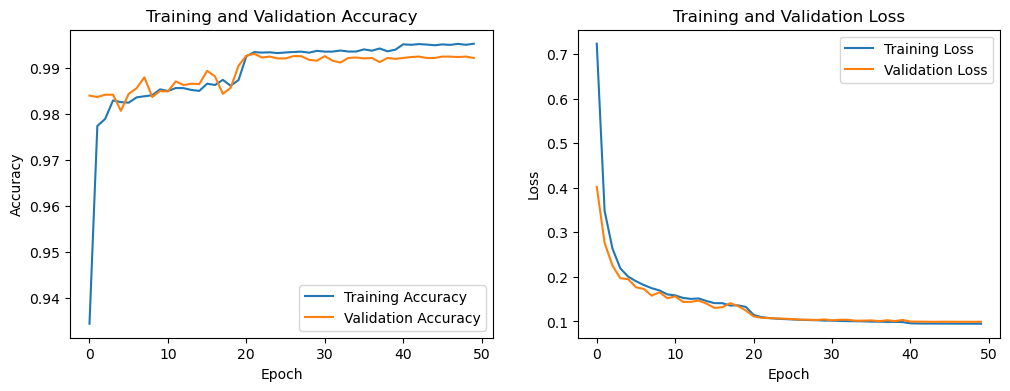

In [24]:
# Plotting training and validation accuracy and loss
def plot_training_history(history):
    epochs = range(len(history.history['accuracy']))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)


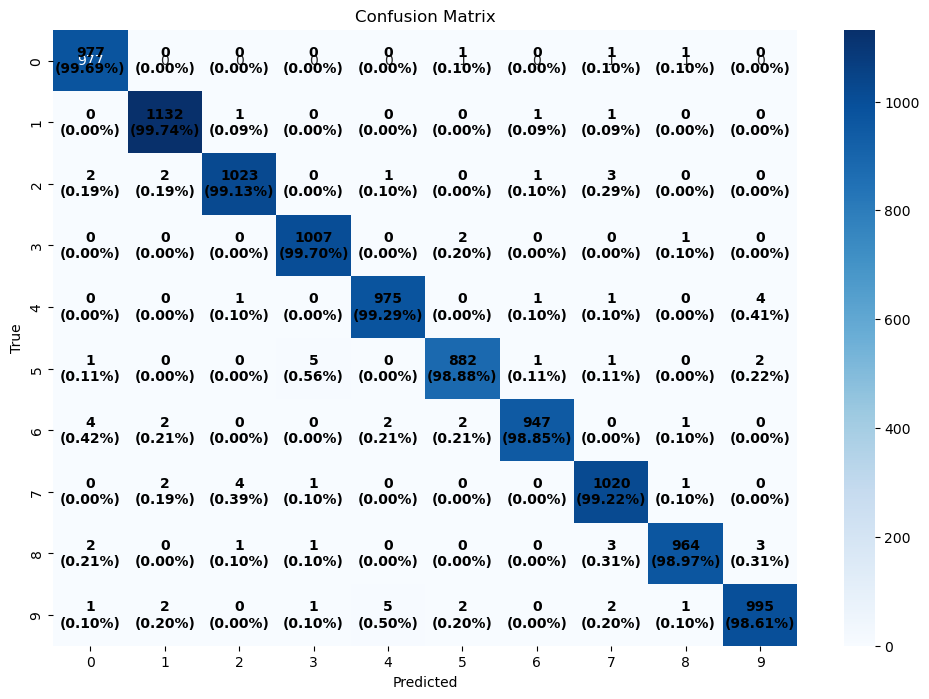

In [25]:

# Define the plot_confusion_matrix function
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j + 0.5, i + 0.5, f'{cm[i, j]}\n({cm_percentage[i, j]:.2f}%)',
                     ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(test_labels, cnn_predictions_labels, class_names)

### KNN

### Importing dataset

### Loading and Preprocessing Data for K-Nearest Neighbors (KNN)

For using the K-Nearest Neighbors (KNN) algorithm, we need to flatten the images from the 2D format (28x28) to a 1D format (784 pixels). This is because KNN operates on feature vectors rather than image matrices.

Steps involved:
1. **Loading the Data Again:** Reload the MNIST dataset to ensure clarity and separation of data preparation steps.
2. **Flattening the Images:** Reshape the training and testing images from (28x28) to (28*28 = 784) to create a 1D feature vector for each image.


In [26]:
# Load data again for clarity, this time flatten images for KNN
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images_flatten = train_images.reshape((60000, 28*28))
test_images_flatten = test_images.reshape((10000, 28*28))

### Normalizing Flattened Images for KNN

After flattening the images, we need to normalize the pixel values to the range [0, 1] to ensure that the K-Nearest Neighbors (KNN) algorithm performs optimally.

Steps involved:
1. **Normalization:** Scale the pixel values of the flattened images from the range [0, 255] to [0, 1].


In [27]:
# Normalize
train_images_flatten = train_images_flatten.astype('float32') / 255
test_images_flatten = test_images_flatten.astype('float32') / 255

### Defining and Training the K-Nearest Neighbors (KNN) Classifier

Now, we define and train the K-Nearest Neighbors (KNN) classifier on the flattened and normalized training images. The KNN algorithm is a simple, instance-based learning method used for classification and regression.

Steps involved:
1. **Define the KNN Classifier:** Initialize the KNN classifier with a specified number of neighbors (in this case, 3).
2. **Train the KNN Classifier:** Fit the KNN classifier using the flattened and normalized training images and their corresponding labels.


In [28]:
# Define and train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_images_flatten, train_labels)

KNeighborsClassifier(n_neighbors=3)

### Making Predictions and Evaluating the KNN Classifier

After training the K-Nearest Neighbors (KNN) classifier, the next step involves making predictions on the test set and evaluating the performance of the classifier.

Steps involved:
1. **Making Predictions:** Use the trained KNN classifier to predict the labels of the test images.
2. **Calculating Accuracy:** Compute the accuracy of the KNN classifier by comparing the predicted labels with the true labels of the test set.
3. **Generating Confusion Matrix:** Create a confusion matrix to visualize the performance of the classifier, showing the counts of true positive, true negative, false positive, and false negative predictions.

The accuracy score provides a quantitative measure of the classifier's performance, while the confusion matrix offers a detailed breakdown of the classifier's ability to correctly and incorrectly predict each class.


In [29]:
knn_predictions = knn.predict(test_images_flatten)
knn_accuracy = accuracy_score(test_labels, knn_predictions)
knn_conf_matrix = confusion_matrix(test_labels, knn_predictions)

KNN Accuracy: 97.05%
CNN Accuracy: 99.22%


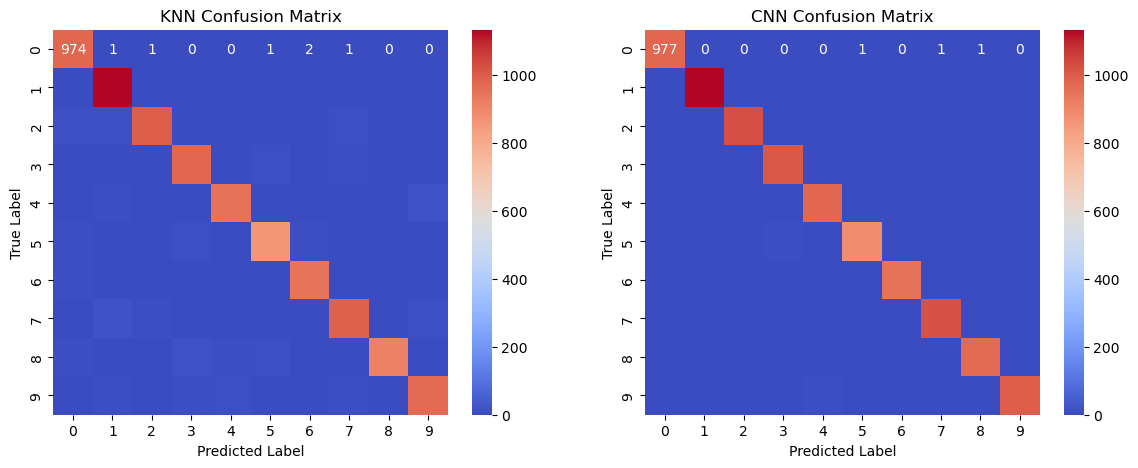

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Print accuracies
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print(f"CNN Accuracy: {cnn_accuracy * 100:.2f}%")

# Function to plot confusion matrices side by side
def plot_confusion_matrices(cm1, cm2, class_names, title1='KNN Confusion Matrix', title2='CNN Confusion Matrix'):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    sns.heatmap(cm1, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names, ax=axes[0])
    axes[0].set_title(title1)
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')
    
    sns.heatmap(cm2, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names, ax=axes[1])
    axes[1].set_title(title2)
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')
    
    plt.show()

# Define class names for the MNIST dataset
class_names = [str(i) for i in range(10)]

# Generate confusion matrices for KNN and CNN
knn_conf_matrix = confusion_matrix(test_labels, knn_predictions)
cnn_conf_matrix = confusion_matrix(test_labels, cnn_predictions_labels)

# Plot confusion matrices
plot_confusion_matrices(knn_conf_matrix, cnn_conf_matrix, class_names)


## Performance Comparison Between CNN and KNN Classifier

### Accuracy Comparison:
- The **Convolutional Neural Network (CNN)** has an accuracy of **0.992**.
- The **K-Nearest Neighbors (KNN)** classifier has an accuracy of **0.9705**.
- **Conclusion**: The CNN outperforms the KNN classifier in terms of overall accuracy.

### Confusion Matrix Analysis:
- The KNN confusion matrix shows some misclassifications across various classes, notably between classes 4 and 9, 5 and 3, and several others.
- The CNN confusion matrix displays fewer misclassifications across the board, with most errors being off by only a few instances.
- **Conclusion**: The CNN not only shows higher accuracy but also demonstrates a superior confusion matrix, indicating better class-specific accuracy and less confusion between different classes.

### Overall Assessment:
The CNN exhibits a higher overall accuracy and a cleaner confusion matrix, indicating a more precise classification among the various classes. While the KNN with \( k=3 \) performs well, it is not as accurate as the CNN. The improved performance of the CNN could be attributed to its ability to learn hierarchical representations of the data, which is particularly advantageous in image classification tasks like the one in question.

Based on these observations, the **CNN approach is better** for this particular task in both overall accuracy and the granularity of classification as depicted by the confusion matrix.
